Practical 8


In [1]:
import numpy as np  # Import numpy library for linear algebra
import pandas as pd  # Import pandas library for data processing, CSV file I/O (e.g., pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the Titanic dataset
df = pd.read_csv("titanic.csv")

In [3]:
# Display the dataset
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Check for missing values in the dataset
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

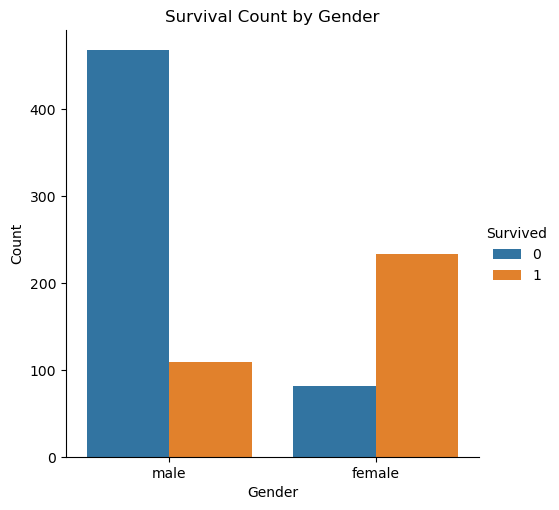

In [8]:
# Count plot of survival by gender
sns.catplot(x="Sex", hue="Survived", kind="count", data=df)
plt.title("Survival Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [9]:
# Group the dataset by Pclass and Survived
group = df.groupby(['Pclass', 'Survived'])

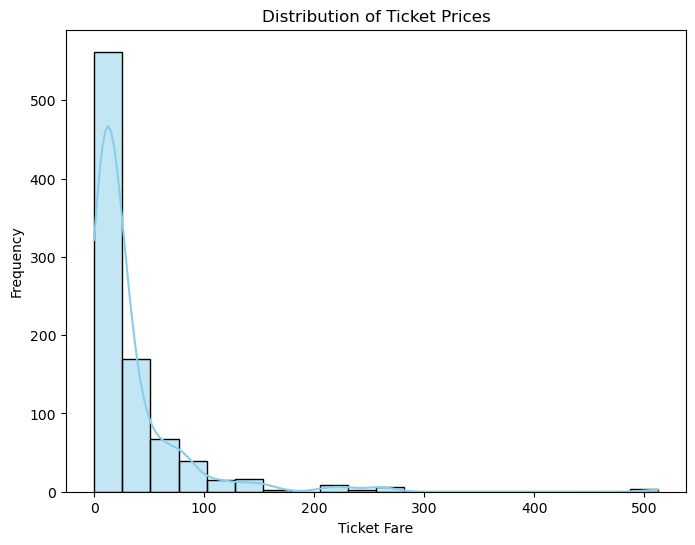

In [10]:
# Plot a histogram of ticket prices
plt.figure(figsize=(8, 6))
sns.histplot(df['Fare'], bins=20, kde=True, color='skyblue')
plt.xlabel('Ticket Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Ticket Prices')
plt.show()

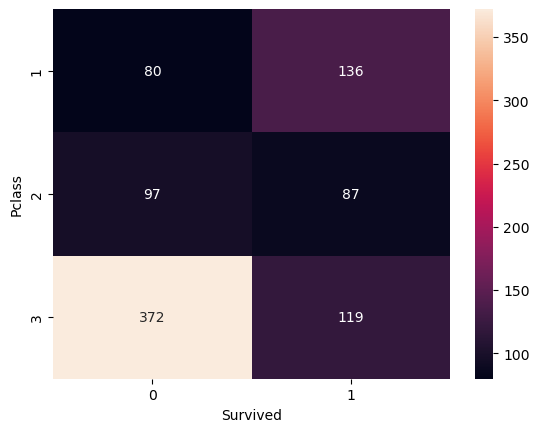

In [11]:
# Heatmap - Color encoded 2D representation of data
group = df.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
sns.heatmap(pclass_survived, annot=True, fmt="d")
plt.show()

In [12]:
# Pie chart for passenger distribution by class
passenger_classes = ['First Class', 'Second Class', 'Third Class']
passenger_counts = [216, 184, 491]


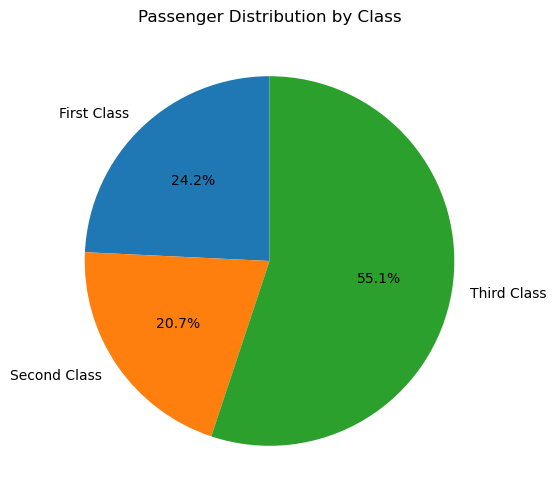

In [13]:
plt.figure(figsize=(8, 6))
plt.pie(passenger_counts, labels=passenger_classes, autopct='%1.1f%%', startangle=90)
plt.title('Passenger Distribution by Class')
plt.show()

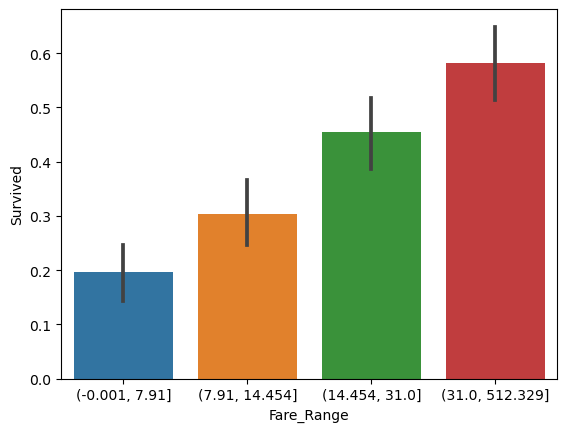

In [14]:
# Bar plot of survival by fare range
df['Fare_Range'] = pd.qcut(df['Fare'], 4)
sns.barplot(x='Fare_Range', y='Survived', data=df)
plt.show()

In [15]:
# Handle missing values in the 'Age' column by filling with the mean
df["Age"].notnull().sum()
df['Age'].fillna(df['Age'].mean(), inplace=True)
df["Age"].notnull().sum()
df["Age"].isnull().sum()


0

In [16]:
# Histogram of fare amounts with custom bins
fare = df[df["Fare"].notnull()]["Fare"].values
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
Fare_hist, _ = np.histogram(fare, bins=bins)
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']


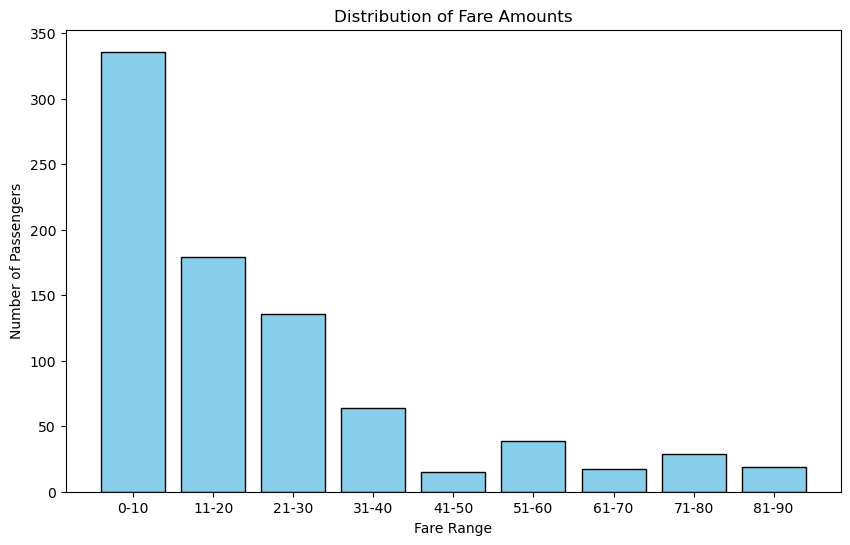

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(labels, Fare_hist, color='skyblue', edgecolor='black')
plt.xlabel('Fare Range')
plt.ylabel('Number of Passengers')
plt.title('Distribution of Fare Amounts')
plt.show()